In [12]:
import pandas as pd
import numpy as np

<h5 align='right'>Open the file</h5>
<hr color='f47b0a'>

In [13]:
path = '/content/drive/MyDrive/Colab Notebooks/video_data.json'

In [14]:
df = pd.read_json(path)

In [15]:
df.head()

,kind,etag,id,snippet,contentDetails,statistics
0,youtube#video,F1OeR0FZpeUpTfGoKi--E2PJbG8,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '46110', 'likeCount': '1345', 'f..."
1,youtube#video,4vZnHCqPYPHcMxU-vH1gBrdvXKo,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...","{'duration': 'PT6M56S', 'dimension': '2d', 'de...","{'viewCount': '60964', 'likeCount': '1935', 'f..."
2,youtube#video,Zu3soK4zL4q79XVbtwTBK6L8TlY,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...","{'duration': 'PT2M6S', 'dimension': '2d', 'def...","{'viewCount': '742990', 'likeCount': '26752', ..."
3,youtube#video,JXCvjVcWEbte7gOjYfzq-sGXDhA,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...","{'duration': 'PT25S', 'dimension': '2d', 'defi...","{'viewCount': '52319', 'likeCount': '1539', 'f..."
4,youtube#video,kqsCsUuvs1r_F04_2E9F6adbV1o,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '238147', 'likeCount': '5895', '..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   kind            5723 non-null   object
 1   etag            5723 non-null   object
 2   id              5723 non-null   object
 3   snippet         5723 non-null   object
 4   contentDetails  5723 non-null   object
 5   statistics      5723 non-null   object
dtypes: object(6)
memory usage: 268.4+ KB


In [17]:
df = df.drop(columns=['etag', 'kind'])

<h5 align='right'>Select Desired Subcolumns</h5>
<hr color='f47b0a'>

In [18]:
df['snippet'][0]

{'categoryId': '17',
 'channelId': 'UCblfuW_4rakIf2h6aqANefA',
 'channelTitle': 'Red Bull',
 'defaultAudioLanguage': 'en',
 'description': '',
 'liveBroadcastContent': 'none',
 'localized': {'description': '',
  'title': 'timbersports training is wild \U0001fa9a \U0001fa93'},
 'publishedAt': '2022-02-09T17:15:40Z',
 'thumbnails': {'default': {'height': 90,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/default.jpg',
   'width': 120},
  'high': {'height': 360,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/hqdefault.jpg',
   'width': 480},
  'maxres': {'height': 720,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/maxresdefault.jpg',
   'width': 1280},
  'medium': {'height': 180,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/mqdefault.jpg',
   'width': 320},
  'standard': {'height': 480,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/sddefault.jpg',
   'width': 640}},
 'title': 'timbersports training is wild \U0001fa9a \U0001fa93'}

In [19]:
mask = df['snippet'].apply(pd.Series)
df['defaultAudioLanguage'] = mask['defaultAudioLanguage']
df['title'] = mask['title']
df['publishedAt']= mask['publishedAt']
df['tags'] = mask['tags']
df.head()

,id,snippet,contentDetails,statistics,defaultAudioLanguage,title,publishedAt,tags
0,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '46110', 'likeCount': '1345', 'f...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,NaN
1,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...","{'duration': 'PT6M56S', 'dimension': '2d', 'de...","{'viewCount': '60964', 'likeCount': '1935', 'f...",en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07T15:00:36Z,"[red bull, redbull, action sports, extreme spo..."
2,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...","{'duration': 'PT2M6S', 'dimension': '2d', 'def...","{'viewCount': '742990', 'likeCount': '26752', ...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,"[red bull, redbull, action sports, extreme spo..."
3,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...","{'duration': 'PT25S', 'dimension': '2d', 'defi...","{'viewCount': '52319', 'likeCount': '1539', 'f...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,NaN
4,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '238147', 'likeCount': '5895', '...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,NaN


In [20]:
df['tags']= pd.Series(df['tags'], dtype="string")
df['tags']=df['tags'].fillna('None')
df['tagsCount'] = df['tags'].apply(lambda x: len(x.split()))
df = df.drop(columns=['snippet'])
print(df['tags'][2])
print(df['tagsCount'][2])

['red bull', 'redbull', 'action sports', 'extreme sports', 'sport videos', 'action', 'sport', 'Max Verstappen', 'max', 'vertappen', 'formula 1', 'formula one', 'f1', 'f1 car', 'f1 car on ice', 'red bull racing', 'ice', 'snow', 'ice track', 'spiked tyres', 'tires', 'tyres', 'pirelli', 'grand prix', 'grand prix ice race', 'GP', 'speedway', 'ice speedway', 'speedway racing', 'race', 'racing', 'motorbike', 'motobike', 'motorcycle', 'driving on ice', 'drive on ice', 'drive on snow', 'race on snow', 'race on ice', 'ice race', 'gp ice race', 'Franky Zorn', 'austria', 'f1 2022']
80


In [21]:
df['statistics'][999]

{'commentCount': '49',
 'favoriteCount': '0',
 'likeCount': '1404',
 'viewCount': '104978'}

In [22]:
mask2 = df['statistics'].apply(pd.Series)
df['commentCount'] = mask2['commentCount']
df['favoriteCount'] = mask2['favoriteCount']
df['likeCount'] = mask2['likeCount']
df['viewCount'] = mask2['viewCount']
df= df.drop(columns=['statistics'])
df.head()

,id,contentDetails,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,favoriteCount,likeCount,viewCount
0,xsPlB4WAmRc,"{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,None,1,16,0,1345,46110
1,q-r6V_PgtcY,"{'duration': 'PT6M56S', 'dimension': '2d', 'de...",en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07T15:00:36Z,"['red bull', 'redbull', 'action sports', 'extr...",63,85,0,1935,60964
2,jxe870HmYBE,"{'duration': 'PT2M6S', 'dimension': '2d', 'def...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,"['red bull', 'redbull', 'action sports', 'extr...",80,1071,0,26752,742990
3,yxVOownOSRs,"{'duration': 'PT25S', 'dimension': '2d', 'defi...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,None,1,62,0,1539,52319
4,3-yglCSCPng,"{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,None,1,46,0,5895,238147


In [23]:
df['contentDetails'][0]

{'caption': 'false',
 'contentRating': {},
 'definition': 'hd',
 'dimension': '2d',
 'duration': 'PT22S',
 'licensedContent': False,
 'projection': 'rectangular'}

In [24]:
mask3 = df['contentDetails'].apply(pd.Series)
df['definition'] = mask3['definition']
df['duration'] = mask3['duration']
df= df.drop(columns=['contentDetails'])

In [25]:
df.head()

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,favoriteCount,likeCount,viewCount,definition,duration
0,xsPlB4WAmRc,en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,None,1,16,0,1345,46110,hd,PT22S
1,q-r6V_PgtcY,en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07T15:00:36Z,"['red bull', 'redbull', 'action sports', 'extr...",63,85,0,1935,60964,hd,PT6M56S
2,jxe870HmYBE,en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,"['red bull', 'redbull', 'action sports', 'extr...",80,1071,0,26752,742990,hd,PT2M6S
3,yxVOownOSRs,en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,None,1,62,0,1539,52319,hd,PT25S
4,3-yglCSCPng,en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,None,1,46,0,5895,238147,hd,PT22S


<h5 align='right'>Investigate a null columns e fill the NaN</h5>
<hr color='f47b0a'>

In [26]:
df['favoriteCount'].isnull().value_counts()

False    5723
Name: favoriteCount, dtype: int64

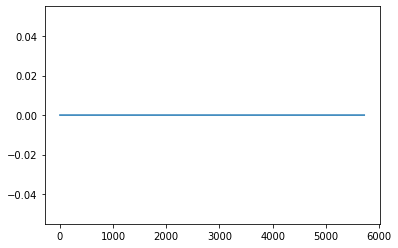

In [27]:
df['favoriteCount'].astype(int).plot()

In [28]:
df=df.drop(columns=['favoriteCount'])

In [29]:
df.isna().value_counts()

id     defaultAudioLanguage  title  publishedAt  tags   tagsCount  commentCount  likeCount  viewCount  definition  duration
False  True                  False  False        False  False      False         False      False      False       False       3955
       False                 False  False        False  False      False         False      False      False       False       1764
                                                                   True          False      False      False       False          2
       True                  False  False        False  False      False         True       False      False       False          2
dtype: int64

In [30]:
df=df.fillna(0)

<h5 align='right'>Change the data type</h5>
<hr color='f47b0a'>

In [36]:
df['YearMonth'] = pd.to_datetime(df['publishedAt']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

df['Year'] = pd.to_datetime(df['publishedAt']).apply(lambda x: '{year}'.format(year=x.year))
df['reaction'] = df['commentCount']+df['likeCount']

df['Year']=df['Year'].astype(int)
df['YearMonth']=df['Year'].astype(int)
res = df.groupby('Year').sum()


In [38]:
df['title']= pd.Series(df['title'], dtype="string")


In [39]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], infer_datetime_format=True)
df['publishedAt'] = df['publishedAt'].dt.tz_localize(None) #to save as excel files
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5723 non-null   object        
 1   defaultAudioLanguage  5723 non-null   object        
 2   title                 5723 non-null   string        
 3   publishedAt           5723 non-null   datetime64[ns]
 4   tags                  5723 non-null   string        
 5   tagsCount             5723 non-null   int64         
 6   commentCount          5723 non-null   int64         
 7   likeCount             5723 non-null   int64         
 8   viewCount             5723 non-null   int64         
 9   definition            5723 non-null   object        
 10  duration              5723 non-null   object        
 11  YearMonth             5723 non-null   int64         
 12  Year                  5723 non-null   int64         
 13  reaction          

In [37]:
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] =df['commentCount'].astype(int)
df['viewCount'] =df['viewCount'].astype(int)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5723 non-null   object        
 1   defaultAudioLanguage  5723 non-null   object        
 2   title                 5723 non-null   string        
 3   publishedAt           5723 non-null   datetime64[ns]
 4   tags                  5723 non-null   string        
 5   tagsCount             5723 non-null   int64         
 6   commentCount          5723 non-null   int64         
 7   likeCount             5723 non-null   int64         
 8   viewCount             5723 non-null   int64         
 9   definition            5723 non-null   object        
 10  duration              5723 non-null   object        
 11  YearMonth             5723 non-null   int64         
 12  Year                  5723 non-null   int64         
 13  reaction          

In [34]:
df['title'][0]

'timbersports training is wild \U0001fa9a \U0001fa93'

<h5 align='right'>Save the new dataset</h5>
<hr color='f47b0a'>

In [40]:
df.to_excel(r'/content/drive/MyDrive/Colab Notebooks/video_data_clean.xlsx',
            index = False, header=True)
